# 필요 라이브러리 불러오기

# 데이터 불러오기

In [3]:
# 데이터를 먼저 확인해봅시다.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 군집화

군집화를 통해서 비슷한 성향을 가진 그룹을 찾아보자.

In [4]:
# 범주형 데이터 제거


In [5]:
# 나중에 비교를 위한 medv 컬럼도 복사 후 제거를 해둡니다.


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# 군집화를 진행하기에 앞서 수월한 시각화 및 설명력을 첨부하기 위하여 PCA를 통해 변수를 2개로 압축해보자.
# 필요 라이브러리를 불러옵니다.


In [8]:
# 정규화 진행
# 객체 생성


In [9]:
# 데이터 학습

# 변환


In [10]:
# 객체 생성


In [11]:
# PCA 학습시키기


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
# 결과값 확인


array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [15]:
# 데이터 프레임 형태로 변환


,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919


# 몇 개로 군집화를 해야할까?

- 위의 데이터를 몇 개의 군집화로 나누는것이 가장 올바른 군집화인지 살펴보자

`KMeans(n_cluster = k)`

- k개의 군집화를 하겠다는 객체 생성

`Kmeans.fit()`

- 학습시키기

`KMeans.inertia_`

- 학습된 KMeans의 응집도를 확인
- 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
- 즉, 낮을수록 군집화가 더 잘되어있음.

`KMeans.predict(data)`

- 학습된 데이터를 바탕으로 데이터를 변환시켜줌

In [18]:
# 라이브러리 불러오기


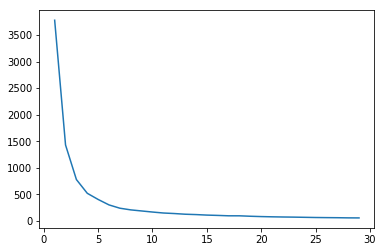

In [23]:
# 그래프 그리기


# ELBOW POINT 4 지정 후 클러스터링 시작

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

,pc1,pc2,labels
0,-2.097234,-0.720179,1
1,-1.456003,-0.947694,1
2,-2.073454,-0.625336,1
3,-2.610161,-0.134044,1
4,-2.456866,-0.229919,1


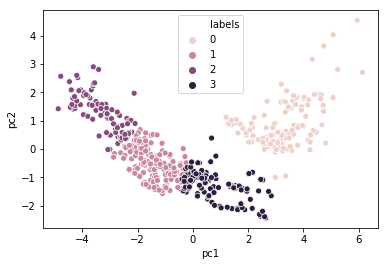

# 클러스터링 결과 해석하기

pca와 클러스터링을 통해 결과를 해석해봅시다.

가장 먼저 어떠한 그룹이 집 값이 높은지 평균을 비교합니다.

In [29]:
# 맨 처음 떼어 두었던 medv 컬럼을 추가합니다.


,pc1,pc2,labels,medv
0,-2.097234,-0.720179,1,24.0
1,-1.456003,-0.947694,1,21.6
2,-2.073454,-0.625336,1,34.7
3,-2.610161,-0.134044,1,33.4
4,-2.456866,-0.229919,1,36.2


16.271641791044775

In [36]:
# 시각화를 위해 각 그룹별 medv값을 따로 변수로 생성합니다.



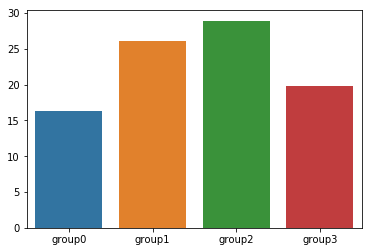

In [37]:
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 '랜덤'임을 잊지 말 것


# 그룹들의 특징을 살펴보자

최상위 그룹과 최하위 그룹의 특징을 살펴보며 집 값이 높은 이유 혹은 집 값이 낮은 이유에 대해서 살펴보겠습니다.

### 최상위층 - 2번그룹
### 최하위층 - 0번그룹

In [40]:
# 원본 데이터에 라벨을 복제합니다.


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,labels
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1


In [44]:
# 각 그룹의 데이터를 나누어서 변수에 담습니다.


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,labels
485,3.67367,0.0,18.10,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,0
486,5.69175,0.0,18.10,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,0
487,4.83567,0.0,18.10,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,0
489,0.18337,0.0,27.74,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,0
490,0.20746,0.0,27.74,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,0


# 시각화를 위한 subplot

`plt.subplots(행, 열, figsize=())`

여러가지의 그림을 그리는 방법입니다.

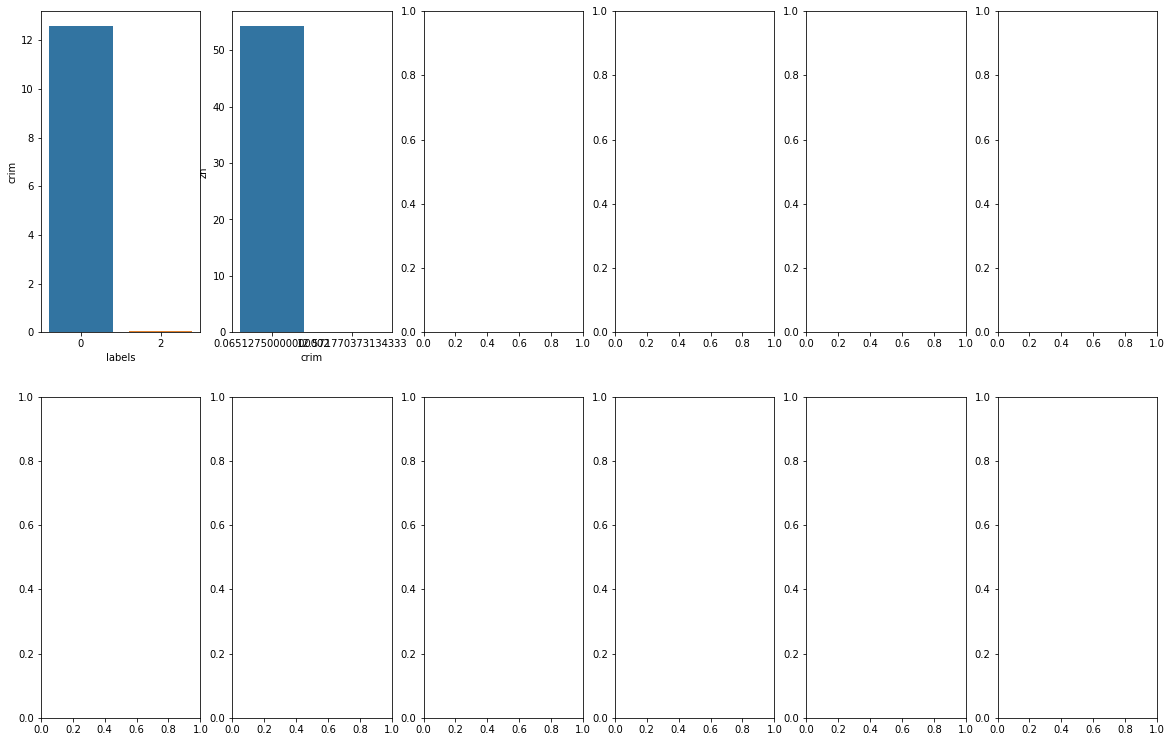

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'labels'],
      dtype='object')

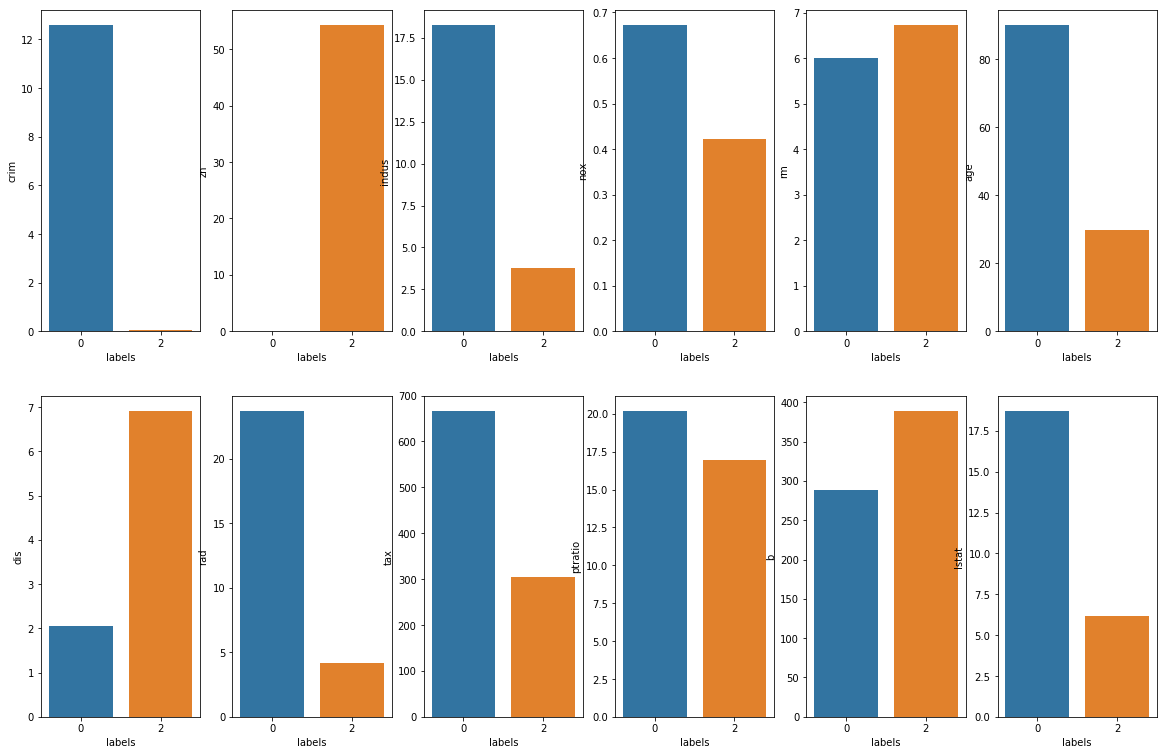

In [59]:
# 반복문을 이용해서 그림을 그려봅시다.





# 결론

그래프에서 보이다 싶이 범죄율이 낮을 수록, 25,000 평방피트를 초과 거주지역 비율이 높을수록 좋은 가격을 나타내는 지역임을 알 수 있습니다다.

또한, 두가지 뿐 아니라 여러가지의 그래프를 보고도 집 값이 높은 지역의 특징들을 살펴볼 수 있습니다.

더 나아가 이번 시간에는 배우지 않지만 레이더차트라는것을 이용해서 그래프를 그린다면 더 깔끔한 시각화로 나타낼 수 있을 것 입니다.